In [2]:
# STEP 1: IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
# STEP 2: LOAD AND PREPARE DATA
data = pd.read_excel('/Users/dumsi/Downloads/Obesity_Dataset.xlsx')

# Stratified split to maintain class balance
train_data, test_data = train_test_split(data, test_size=0.3, stratify=data['Class'], random_state=25)

# Separate features and target
X_train = train_data.drop(columns=['Class'])
y_train = train_data['Class']
X_test = test_data.drop(columns=['Class'])
y_test = test_data['Class']

In [4]:
# STEP 3: FEATURE SCALING
scaler = StandardScaler()

# Fit on training data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

# Transform test data
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [5]:
# STEP 4: BUILD AND TRAIN ANN MODEL
ann_model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=(14,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(40, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(4, activation='softmax')
])

ann_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# EarlyStopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train ANN
ann_history = ann_model.fit(
    X_train_scaled, y_train,
    epochs=30,
    validation_split=0.3,
    callbacks=[early_stop]
)

# Evaluate ANN on test set
print("ANN Evaluation on Test Set:")
ann_test_result = ann_model.evaluate(X_test_scaled, y_test)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2025-07-26 14:40:09.119369: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-07-26 14:40:09.119403: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-07-26 14:40:09.119412: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-07-26 14:40:09.119602: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-26 14:40:09.119612: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pc

Epoch 1/30


2025-07-26 14:40:10.915484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 227ms/step - accuracy: 0.3004 - loss: 1.2504 - val_accuracy: 0.5988 - val_loss: 0.7430
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5189 - loss: 0.8866 - val_accuracy: 0.6195 - val_loss: 0.6408
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5567 - loss: 0.7671 - val_accuracy: 0.6372 - val_loss: 0.5777
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5724 - loss: 0.7281 - val_accuracy: 0.6431 - val_loss: 0.5475
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5940 - loss: 0.7073 - val_accuracy: 0.6608 - val_loss: 0.5285
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5560 - loss: 0.6946 - val_accuracy: 0.6549 - val_loss: 0.5114
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6073 - loss: 0.6343 - val_accuracy: 0.6549 - val_loss: 0.4923
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5855 - loss: 0.6453 - val_accuracy: 0.6696 - val_loss: 

Best KNN Parameters: {'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan', 'algorithm': 'auto'}
Best KNN CV Accuracy: 0.8012563211125159
KNN Test Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.59      0.74        22
           2       0.84      0.88      0.86       197
           3       0.78      0.83      0.80       178
           4       0.88      0.77      0.82        86

    accuracy                           0.83       483
   macro avg       0.88      0.77      0.81       483
weighted avg       0.83      0.83      0.83       483



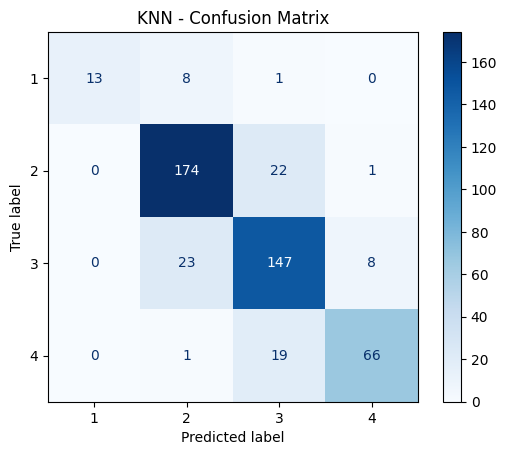

In [6]:
# STEP 5: KNN CLASSIFIER WITH HYPERPARAMETER TUNING
knn_params = {
    'n_neighbors': list(range(3, 25)),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'algorithm': ['auto']
}

knn_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=knn_params,
    cv=10,
    n_iter=100,
    scoring='accuracy',
    random_state=25
)

knn_search.fit(X_train_scaled, y_train)

print("Best KNN Parameters:", knn_search.best_params_)
print("Best KNN CV Accuracy:", knn_search.best_score_)

# Evaluate on test set
knn_predictions = knn_search.predict(X_test_scaled)
print("KNN Test Classification Report:")
print(classification_report(y_test, knn_predictions))

ConfusionMatrixDisplay(confusion_matrix(y_test, knn_predictions), display_labels=knn_search.best_estimator_.classes_).plot(cmap='Blues')
plt.title("KNN - Confusion Matrix")
plt.show()


Best SVM Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Best SVM CV Accuracy: 0.7967683312262958
SVM Test Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.59      0.67        22
           2       0.85      0.87      0.86       197
           3       0.78      0.84      0.81       178
           4       0.86      0.72      0.78        86

    accuracy                           0.82       483
   macro avg       0.81      0.76      0.78       483
weighted avg       0.82      0.82      0.82       483



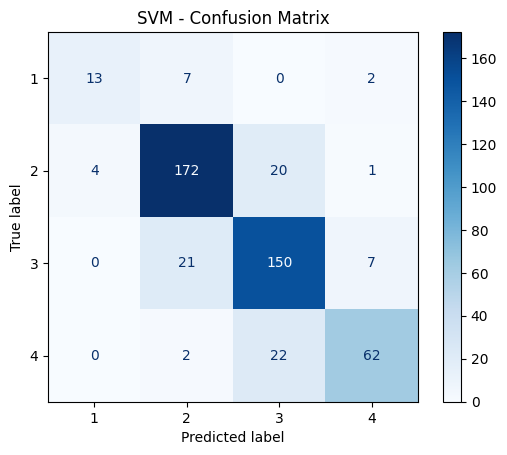

In [7]:
# STEP 6: SVM CLASSIFIER WITH RBF KERNEL
svm_params = {
    'C': list(range(1, 20)),
    'kernel': ['rbf'],
    'gamma': [0.1, 0.01, 'scale', 0.5, 1, 1.5]
}

svm_search = RandomizedSearchCV(
    SVC(),
    param_distributions=svm_params,
    cv=10,
    n_iter=30,
    scoring='accuracy',
    random_state=25
)

svm_search.fit(X_train_scaled, y_train)

print("Best SVM Parameters:", svm_search.best_params_)
print("Best SVM CV Accuracy:", svm_search.best_score_)

# Evaluate on test set
svm_predictions = svm_search.predict(X_test_scaled)
print("SVM Test Classification Report:")
print(classification_report(y_test, svm_predictions))

ConfusionMatrixDisplay(confusion_matrix(y_test, svm_predictions), display_labels=svm_search.best_estimator_.classes_).plot(cmap='Blues')
plt.title("SVM - Confusion Matrix")
plt.show()


Best RF Parameters: {'n_jobs': -1, 'n_estimators': 150, 'min_samples_split': 2, 'max_features': 3, 'max_depth': 15}
Best RF CV Accuracy: 0.8323166877370418
Random Forest Test Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.55      0.71        22
           2       0.86      0.92      0.89       197
           3       0.83      0.88      0.85       178
           4       0.96      0.81      0.88        86

    accuracy                           0.87       483
   macro avg       0.91      0.79      0.83       483
weighted avg       0.88      0.87      0.87       483



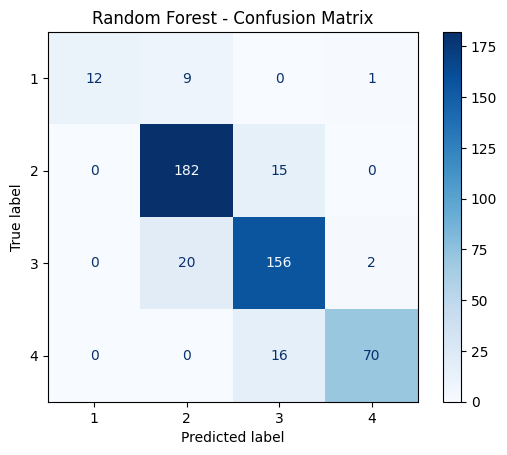

In [8]:
# STEP 7: RANDOM FOREST CLASSIFIER
rf_params = {
    'n_estimators': [100, 150, 200, 250, 300, 350, 400],
    'max_depth': list(range(2, 20)),
    'min_samples_split': list(range(2, 7)),
    'max_features': list(range(2, 14)),
    'n_jobs': [-1]
}

# Use raw data (no scaling needed for tree models)
rf_search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rf_params,
    cv=10,
    n_iter=80,
    scoring='accuracy',
    random_state=25
)

rf_search.fit(X_train, y_train)

print("Best RF Parameters:", rf_search.best_params_)
print("Best RF CV Accuracy:", rf_search.best_score_)

# Evaluate on test set
rf_predictions = rf_search.predict(X_test)
print("Random Forest Test Classification Report:")
print(classification_report(y_test, rf_predictions))

ConfusionMatrixDisplay(confusion_matrix(y_test, rf_predictions), display_labels=rf_search.best_estimator_.classes_).plot(cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()
